## Obtaining km distributions

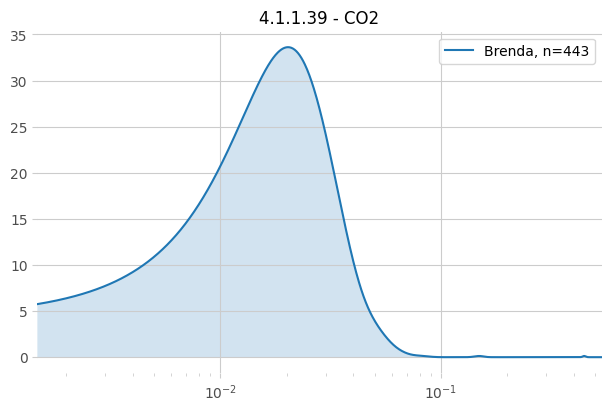

In [1]:
from __future__ import annotations

from pathlib import Path

import matplotlib.pyplot as plt
from parameteriser import (
    plot_parameter_distribution,
    select_substrate,
)
from parameteriser.brenda.v0 import Brenda

# Instationate Brenda
brenda = Brenda()

# Read database if it exists. That avoids excessive downloading.
# You can obtain the database from https://www.brenda-enzymes.org/download.php
if (path := Path.home() / "Documents" / "brenda_2023_1.json").exists():
    brenda.read_database(path)

# Define our inputs
ec = "4.1.1.39"
substrate = "CO2"

# Get all kMs for the EC number
# By default, we will filter all mutant kms
kms_full = brenda.get_kms(
    ec=ec,
    filter_mutant=True,
)

# Select only kms for the substrate of interest
kms_co2 = select_substrate(kms_full, substrate)

fig, ax = plot_parameter_distribution(
    kms_co2["value"],
    title=f"{ec} - {substrate}",
)
plt.show()